[[255.]]


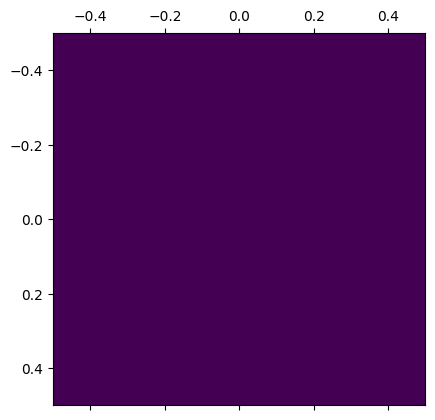

[[0.]]


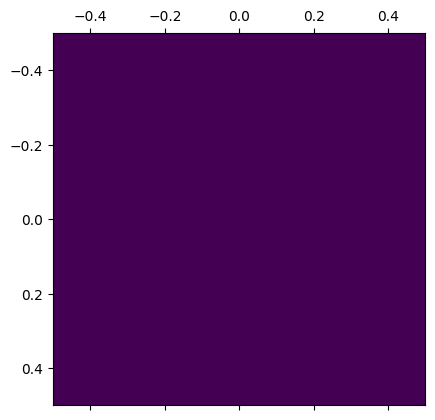

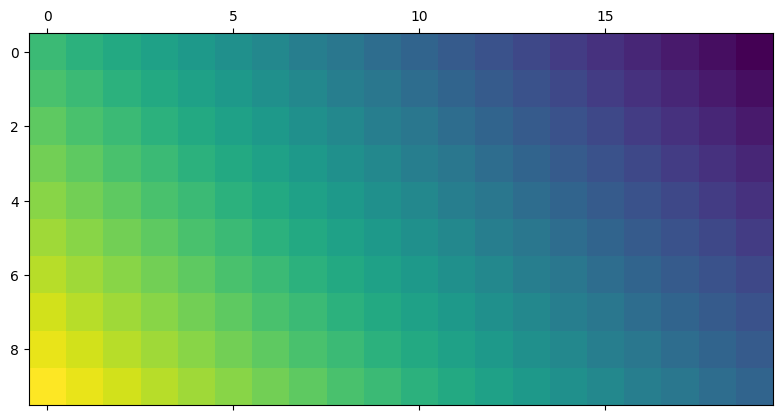

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

def px(vertex, f): #Fonctionne à souhait
    return np.array([[f(vertex[0],vertex[1])]])

def gradient(width,height,f): #fonctionne correctement
    return np.array([[f(i, j) for j in range(height)] for i in range(width)])


def func(n,h=None,w=None):
    if n==1:
        return lambda x,y: atan((y+1)/(x+1))*2/pi
    elif n==2:
        return lambda x,y: 1/(1+exp(-(y+1)/(x+1)))
    elif w is not None:
        if n==3:
            return lambda x,y: atan(w/pi/y)*2/pi if y>0 else 1
        elif n==4:
            return lambda x,y: 1-x/w
    if w is not None and h is not None:
        if n==5:
            return lambda x,y: -(y-x)/w+h
    elif n==6:
        return lambda x,y: sin(x)*2/pi
    elif n==7:
        return lambda x,y: func(6)(y,x) #sin(y)*2/pi
    elif n==8:
        return lambda x,y: func(6)((x+1)*(y+1),0) #sin(y*x)*2/pi
    elif n==9:
        return lambda x,y: (cos(x)+cos(y))/2
    elif n==10:
        return lambda x,y: func(9)(x,y+pi) #(cos(x)-cos(y))/2
    elif n==11:
        return lambda x,y: (cos(x)*cos(y))
    elif n==12:
        return lambda x,y: int(func(11)(x+1,y+1)+1)

def visualisation(gradient):
    h, w = np.shape(gradient)
    img = np.empty((h, w))
    for i in range(h):
        for j in range(w):
            img[i, j] = int(255 * gradient[i, j])
    plt.matshow(img)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def visualisation_px(a): # C'est buggé
    img = np.empty((1,1))
    img[0,0]= int(255*a[0,0])
    print(img)
    plt.matshow(img)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

a=px((0,0),func(12))
b=px((1,0),func(12))
visualisation_px(a)
visualisation_px(b)

visualisation(gradient(10,20,func(5,10,20)))
